<a href="https://colab.research.google.com/github/yankikalfa/MGTF-405-Business-Forecasting/blob/main/Lec1-%20Loss_Eval_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture 1 TA Notes: 
#Loss Functions, Graphical Evaluation & Evaluation Metrics, and Desirable Properties of Forecasts

###Author: S. Yanki Kalfa

###Contact: Yanki.Kalfa@rady.ucsd.edu


## Introduction to Loss Functions
Forecasting is an important exercise used by many analysts in industry. For example, we make forecasts about inflation, unemployment, and stock returns. However, one important element in forecasting is the cost of forecast errors. The loss function elegantly summarizes the trade-off between the forecast and actual data. In an ideal world, where forecast are based on a decision-theoretic framework, we would make forecasts based on the loss function constructed for that specific problem. This makes loss functions of crucial importance.

An assumption that we will make is that the loss is minimized when the forecast is equal to the outcome (perfect forecast). This is important because if perfect forecast minimizes the loss, then it must be that the loss will take on positive values for any other forecast.
$$min_{f}L(f,y) = L(y,y) = $$
$$\text{For} \quad f \neq y \quad L(f,y) > 0$$
Where $f$ represents forecasts and $y$ represents actual data.
## Properties of Loss Functions
We have three regularity conditions for loss functions:


1.   $L(0) = 0 $
2.   $L(e) \geq 0 \quad \forall e$
3.   $L(e)$ is nonincreasing in e for $e<0$ and $L(e)$ is nondecreasing in e for $e>0$.
$$ L(e_1) \leq L(e_2) \quad if \quad e_2 < e_1 < 0$$
$$L(e_1) \leq L(e_2) \quad if \quad e_2 > e_1 > 0$$


## Specific Loss Functions
We will show some loss functions that only depend on the forecast error.
Probably the most common loss function utilized is the **Squared Error Loss (MSE)**.
$$ L(e) = ce^2$$ for some constant $c>0$

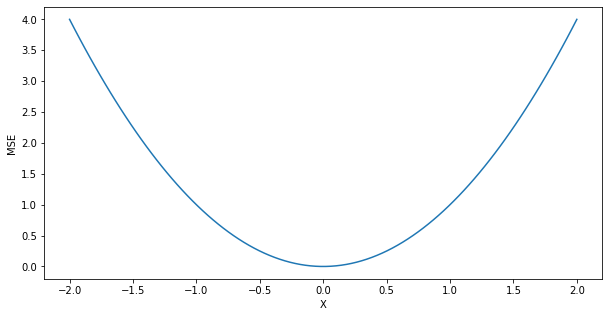

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating vectors X and Y
x = np.linspace(-2, 2, 100)
y = x ** 2
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('MSE')

# Show the plot
plt.show()

In addition to satisfying the three properties discussed in the above section, the squared loss is also symmetric.
$$ L(-e) = L(e) .$$
The second loss function we show is the **Mean Absolute Loss (MAE)**
$$ L(e) = c |e| $$ for constant $c>0$.

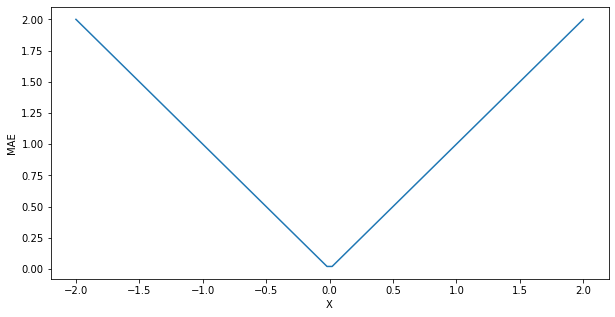

In [2]:
x = np.linspace(-2, 2, 100)
y = np.abs(x)
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('MAE')
 
# Show the plot
plt.show()

MAE loss is also symmetric, yet it is not differentiable at 0.

We next show the **Piecewise Linear** or **Lin-Lin** loss
$$ L(e) = -c(1-α)e \quad | e \leq 0$$
$$L(e) = c \alpha e \quad |e>0$$
And $\alpha \in (0,1)$


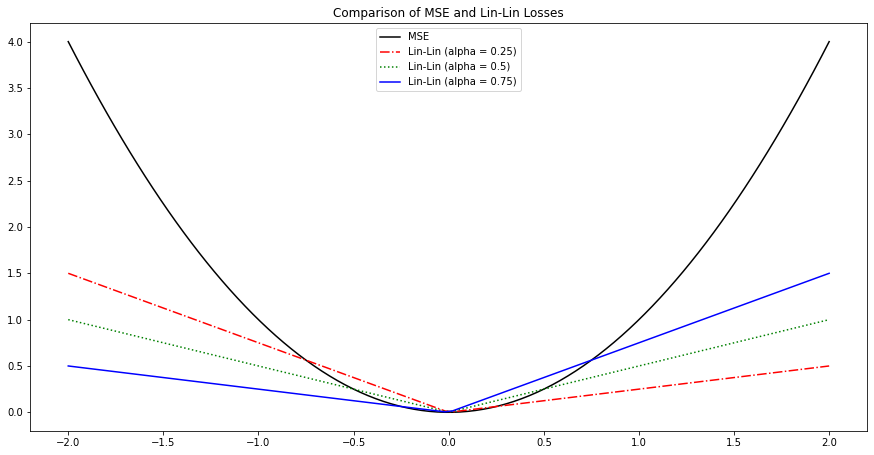

In [3]:
x = np.linspace(-2, 2, 100)
y_25 = np.piecewise(x,[x<=0,x>0] , [lambda x: (-(0.75))*x, lambda x: 0.25*x ])
y_5 = np.piecewise(x,[x<=0,x>0] , [lambda x: (-(0.5))*x, lambda x: 0.5*x ])
y_75 = np.piecewise(x,[x<=0,x>0] , [lambda x: (-(0.25))*x, lambda x: 0.75*x ])
y_mse = x ** 2

fig = plt.figure(figsize = (15, 7.5))
plt.plot(x, y_mse, 'k', label ='MSE') 
plt.plot(x, y_25, 'r-.', label ='Lin-Lin (alpha = 0.25)')
plt.plot(x, y_5, 'g:', label ='Lin-Lin (alpha = 0.5)')
plt.plot(x, y_75, 'b', label ='Lin-Lin (alpha = 0.75)')
 
# Add features to our figure
plt.legend()
plt.title('Comparison of MSE and Lin-Lin Losses')
# Show plot
plt.show()


This graph showcases the flexibility of the Lin-Lin loss. It is clear to see that for $\alpha \in (0,0.5)$ Lin-Lin penalizes negative forecast errors more significantly compared to positive forecast errors. We may want to use this range of alphas if we don't want to over-predict. The opposite is true for $\alpha \in (0.5,1)$, here we are penalized signigicantly for under-predictions. Lin-Lin with and equal weighted $\alpha$ corresponds to MAE (c=0.5). One thing to note is that small forecast errors are more coslty under MAE Loss compared to MSE.

##Informal Forecast Evaluation Methods

Before considering parametric or statistical forecast evaluation methods, we consider graphical forecast evaluation techniques. Informal evaluation methods most often give us a good idea on how the forecasts are performing. Graphical methods can show us if there is bias (one sided errors).

For this exercise we will use NVDA's price data (collected from Yahoo Finance) and then use statsmodels to model and forecast.

In [4]:
! pip install statsmodels -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 4.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [5]:
import statsmodels.api as sm
import pandas as pd

In [6]:
 df = pd.read_csv('/content/drive/MyDrive/NVDA.csv',index_col='Date', parse_dates=True)

In [7]:
import seaborn as sns

### 30 Step Ahead Forecasts

We first plot NVIDIA's stock price.

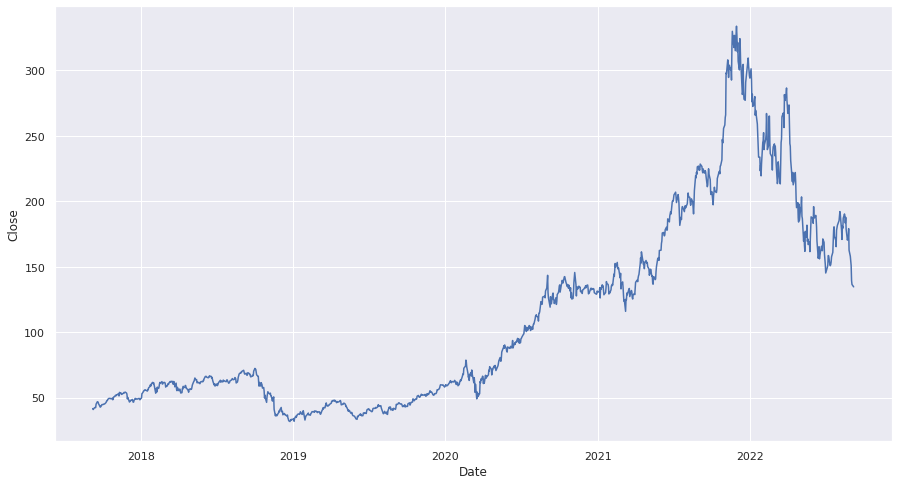

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df,x='Date', y='Close')

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

Before building our simple model, we first need to split the dataset between train and test subsets. We will use the train sunbset to train our model, and use the test subset to evaluate the forecasts.

In [10]:
df['close_1'] = df['Close'].shift(1)
df['close_2'] = df['Close'].shift(2)
df_train =df.iloc[0:-30]
df_test=df.iloc[-30:]

In [11]:
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,close_1,close_2
Date,,,,,,,,
2022-07-26,168.889999,169.190002,164.779999,165.330002,165.330002,39786500,170.240005,173.190002
2022-07-27,170.320007,179.360001,169.130005,177.899994,177.899994,56977600,165.330002,170.240005
2022-07-28,179.750000,181.399994,174.399994,179.839996,179.839996,47464600,177.899994,165.330002
2022-07-29,178.130005,182.440002,176.919998,181.630005,181.630005,43546000,179.839996,177.899994
2022-08-01,181.820007,188.460007,179.899994,184.410004,184.410004,47646900,181.630005,179.839996


Now that we created our train and test sets, we are going to fit an AR(2) model to our train data.

In [12]:
mod = ARIMA(df_train['Close'],order=(2,0,0))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1228
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3580.376
Date:                Fri, 23 Sep 2022   AIC                           7168.752
Time:                        04:10:07   BIC                           7189.205
Sample:                             0   HQIC                          7176.448
                               - 1228                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.7030     69.644      1.561      0.119     -27.796     245.202
ar.L1          0.9438      0.017     55.222      0.000       0.910       0.977
ar.L2          0.0544      0.017      3.198      0.001       0.021       0.088
sigma2        19.8617      0.365     54.390      0.000      19.146      20.577
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3491.49
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              23.46   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We will now get the in sample fit of our model.

In [13]:
in_sample_fit = results.predict()

In [14]:
import matplotlib.pyplot as plt


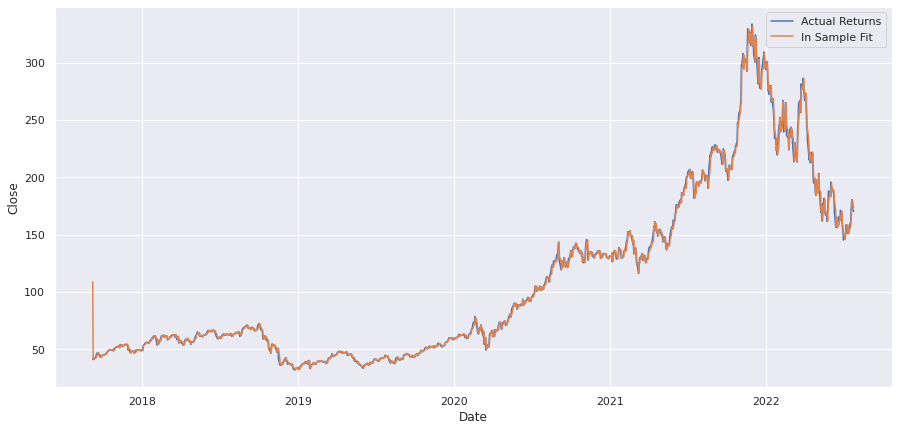

In [15]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_train['Close'],label = 'Actual Returns')
sns.lineplot(data=in_sample_fit, label = 'In Sample Fit')
plt.legend()
plt.show()

By looking at the in sample fit, we can see that the fit follows the actual very closely, however, it is possible that we cannot see the finer details of the fit.
**We note that a good in sample fit does not mean good out of sample forecasts**

In [16]:
start=len(df_train)
end=len(df)-1
oos_forecast = pd.DataFrame(results.predict(start=start, end=end, dynamic=False,
                                          typ='levels').rename('oos_forecast'))

In [17]:
oos_forecast.set_index(df_test.index.copy(),inplace=True)
df_test['f_h30'] = oos_forecast['oos_forecast']
#df_test.head()

In [18]:
df_new= df_train.append(df_test)
#df_new.head()

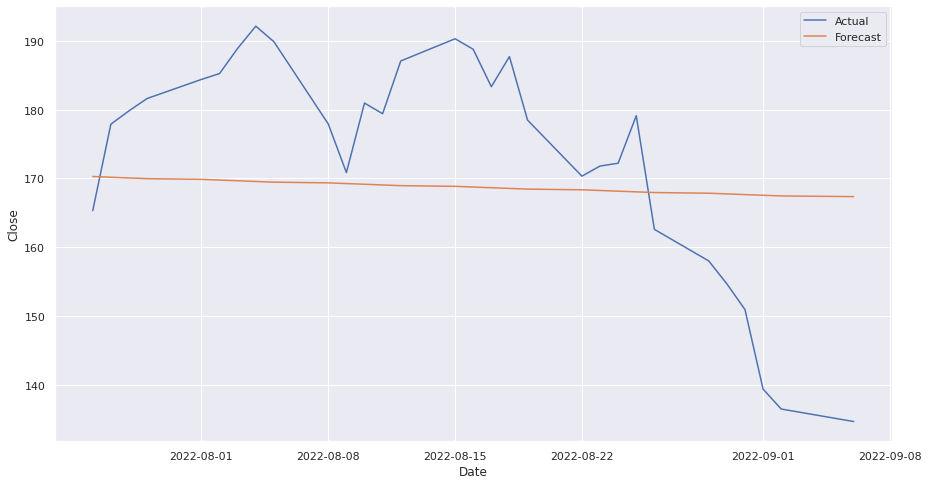

In [51]:
sns.lineplot(data=df_test, x='Date',y='Close',label='Actual')
sns.lineplot(data=df_test, x='Date',y='f_h30',label='Forecast')
plt.legend()


Just by looking at the in sample fit we may think that our model performs well, however, that does not mean that our out of sample forecasts are going to be good. This is especially true for stock prices and returns.

Now let's look at some informal evaluation methods. We will make use of scatterplots and time series graphs..

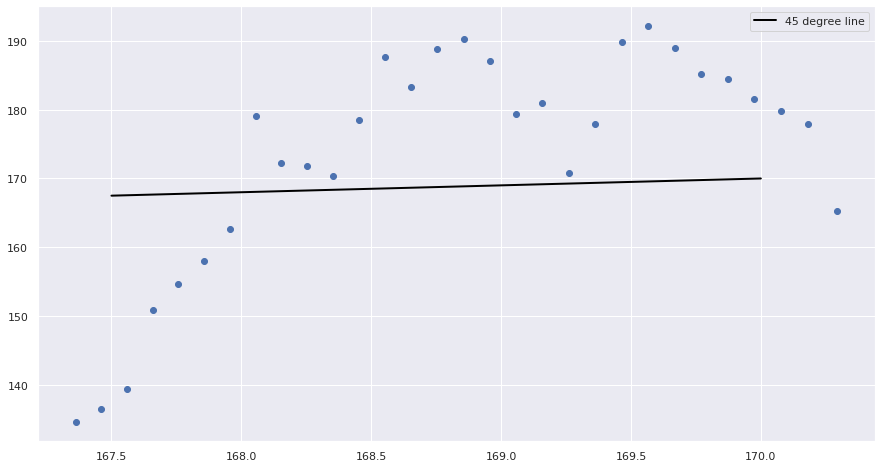

In [20]:
plt.scatter(x=df_test['f_h30'],y=df_test['Close'])
plt.plot([167.5, 170], [167.5,170], color = 'black', linewidth = 2, label='45 degree line')
plt.legend()

This is just a scatterplot of the forecasted values against the actual. However, this plot is informative in the sense that it shows if we are over or under predicing. A clearer way of plotting the same infornation with the addition of time is to plot the forecast erros against time.


In [21]:
df_test['fe_h30'] = df_test['Close'] - df_test['f_h30']

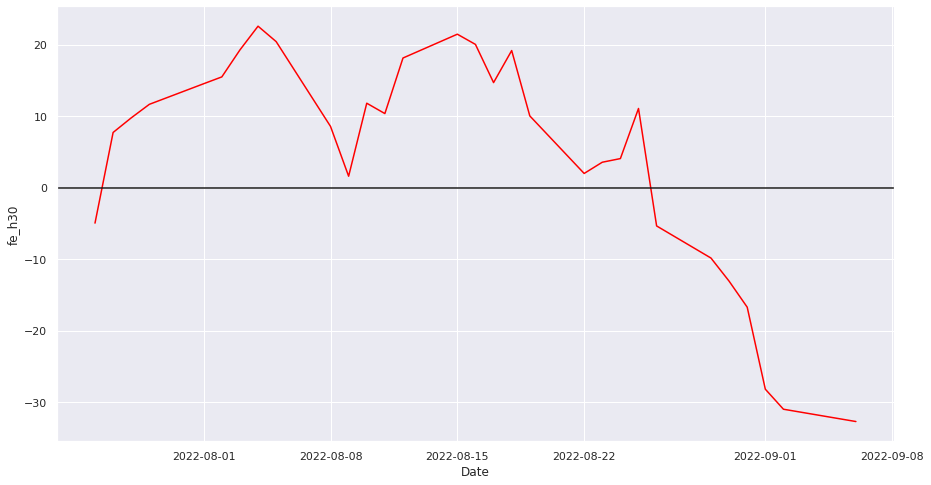

In [22]:
g=sns.lineplot(data=df_test,x='Date',y='fe_h30',color='red')
g.axhline(0,color='k')
plt.show()

The above plot shows that we are mostly underpredicting the closing price of NVIDIA. By looking at this graph we can see that the average of the forecast errors is not 0, hence our forecasts might be biased (which is a sign of poor forecasting performance).

Another possible way of plotting our errors is to produce a density plot. The Kernel Density (KDE) plot will show us the mode of our forecast errors. As shown above, the KDE plot is not centered around zero.

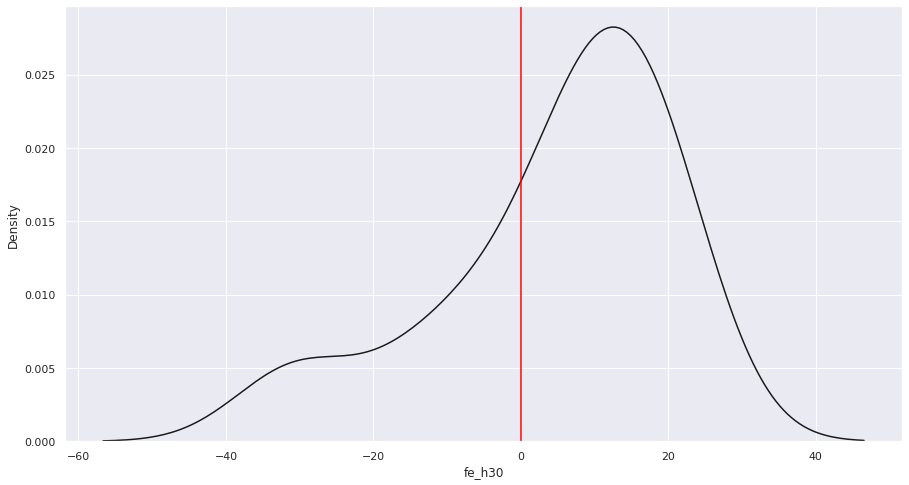

In [23]:
g=sns.kdeplot(x=df_test['fe_h30'], color='k')
g.axvline(0,color='red')
plt.show()

### 1 Step Ahead Forecasts Without Updating Estimation (Ex-Post)

We used the trained model to produce a 30 day forecast. However, you can imagine that we are updating the forecast after each observation. Further suppose that we are not updating our estimation, so we will use the same coefficients estimated using our training sample.


In [24]:
df_test['f_h1_xp'] = results.params[0] + results.params[1]*df_test['close_1'] + results.params[2]*df_test['close_2']

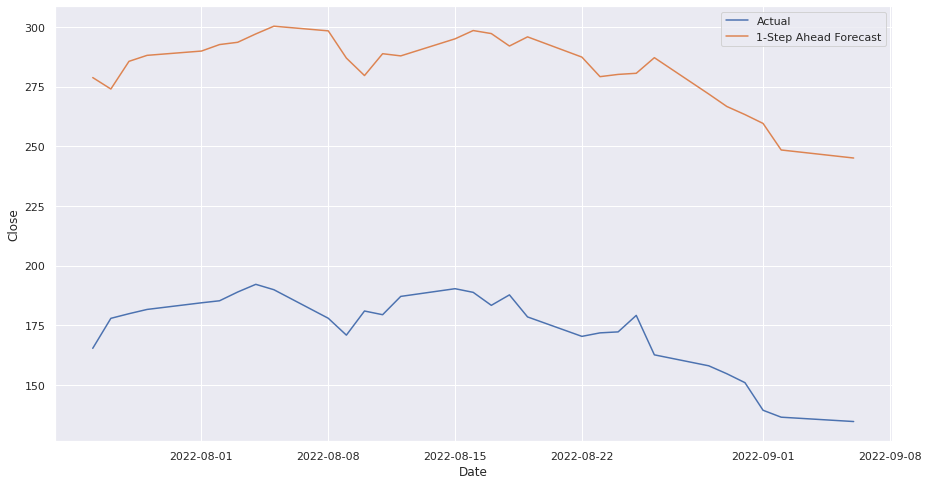

In [25]:
sns.lineplot(data=df_test, x='Date',y='Close',label='Actual')
sns.lineplot(data=df_test, x='Date',y='f_h1_xp',label='1-Step Ahead Forecast')
plt.legend()

This plot is definitely very different from the first case. This is what we call a 1 step ahead forecast, which we iterated for 30 periods. Even though these forecasts look much better than what we had before, they still perform poorly. Let's calculate our forecast errors, and do some plotting.

In [26]:
df_test['fe_h1_xp']  = df_test['Close'] - df_test['f_h1_xp']
#df_test.head()


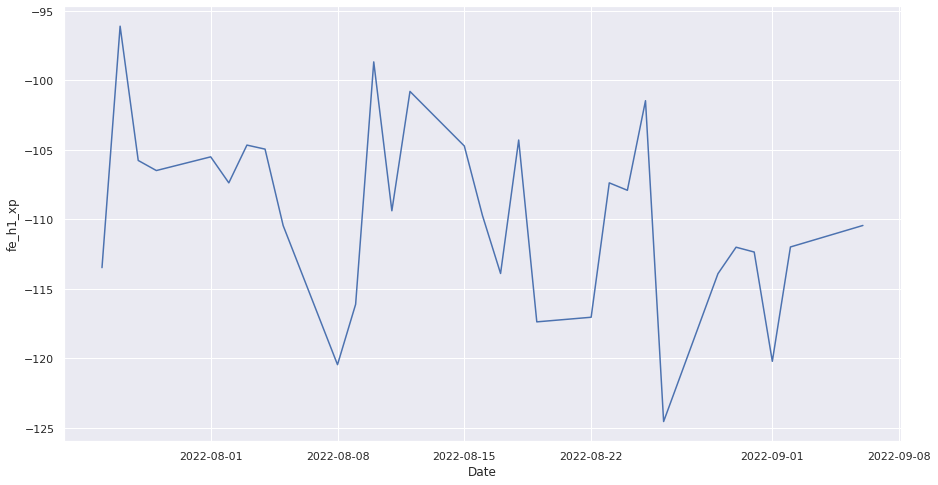

In [27]:
sns.lineplot(data=df_test, x='Date', y='fe_h1_xp')

This plot gives us the sense that our forecast errors seem almost like a White Noise process, but we would need to run stationarity tests for that.

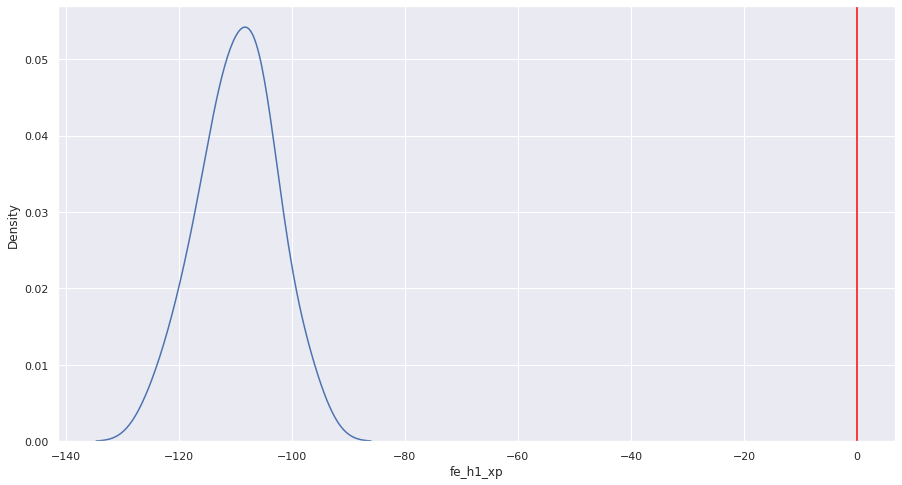

In [28]:
g=sns.kdeplot(data= df_test,x='fe_h1_xp')
g.axvline(0,color='red')
plt.show()

When we plot the distribution of the errors we see that our model, on average, over predicts the price of NVIDIA.


Until now we considered a 30 step ahead forecast and 1 step ahead forecasts without updating our estimation with new observation (Ex-Post forecasts). We now consider a more computationally demanding forecasting procedure. When evaluating forecasts, we want to emulate real life as much as possible. Suppose now that we would like to update our training sample and re-estimate our model with each new observation we get. This means that with new observation we want to re-run our model and generate a 1 step ahead forecast. This is much closer to reality, because we would want to update our estimation every time we have a new observsation. This is called expanding window forecasting.




### Expanding Window 1 Step Ahead Forecasts 

To accomplish what we discussed above, we have to do the following:
1. Generate 30 different time series slices.
2. Create a function that would take these slices as argument, and update the coefficient estimates.
3. Use updated estimates obtained in step 2 to generate 1 step ahead forecasts.

1. Generating 30 different time series slices.

In [29]:
df_train_list = list()
for i in range(0,31):
    df_train_list.append(df[:-30+i])
df_test_list = list()
for i in range(0,30):
    df_test_list.append(df[-30+i:-30+i+1])



Creating function that takes in slices to estimate coefficients and forecast.

In [30]:
def forecasts(x):
  mod = ARIMA(x['Close'],order=(2,0,0))
  results = mod.fit()
  start = len(x)+1 
  end = len(x)+1
  forc = results.predict(start = start, end = end, dyn=False)
  return forc

Applying slices to the function called:

```
forecasts 
```



In [31]:
forecast_list = list()
for i in range (0,30):
  forecast_list.append(forecasts(df_train_list[i]))

Collect the forecasts in a pandas dataframe and use the correct time index.

In [32]:
forecasts_df = pd.DataFrame(forecast_list)
forecasts_df['forecasts']=forecasts_df.sum(axis=1)
forecasts_df.set_index(df_test.index.copy(),inplace=True)
forecasts_df=forecasts_df.iloc[:,-1]

Create a new column in our test subset to hold the forecasts generated usign the expanding window method.

In [33]:
df_test['f_h1_xw'] = forecasts_df

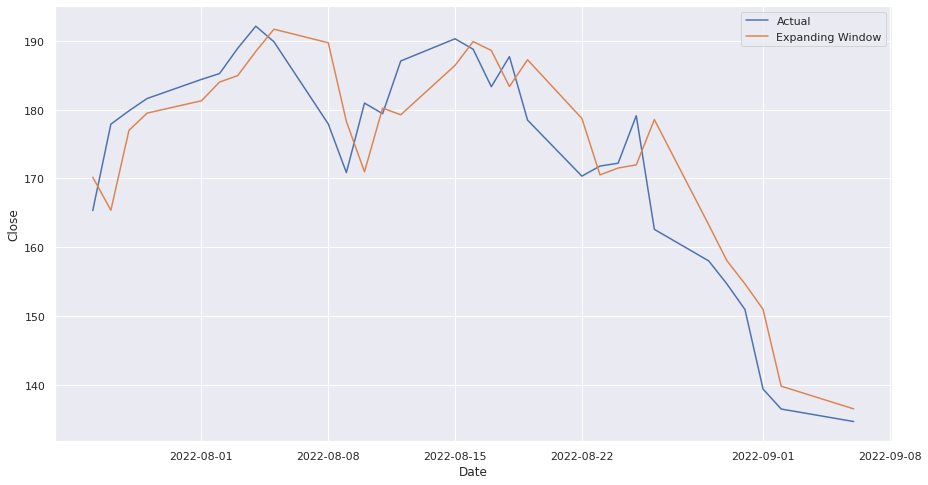

In [34]:
sns.lineplot(data=df_test,x='Date',y='Close',label='Actual')
sns.lineplot(data=df_test,x='Date',y='f_h1_xw',label='Expanding Window')
plt.legend()


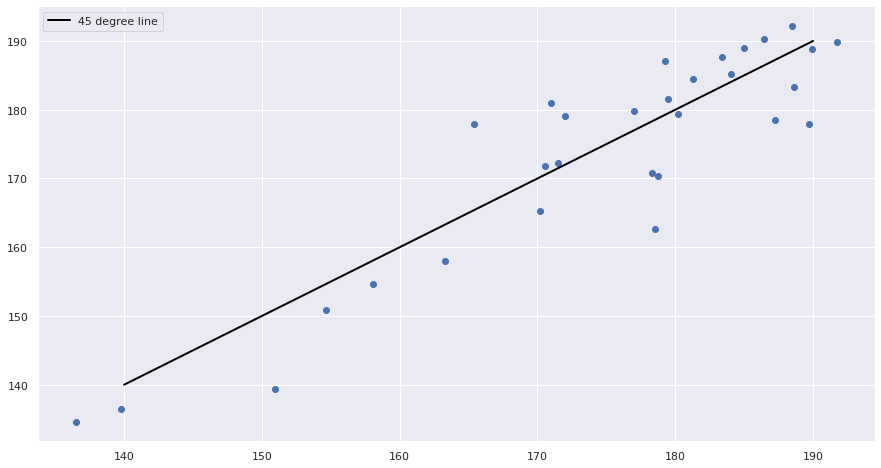

In [35]:
plt.scatter(x=df_test['f_h1_xw'],y=df_test['Close'])
plt.plot([140, 190], [140, 190], color = 'black', linewidth = 2, label='45 degree line')
plt.legend()

In [36]:
df_test['fe_h1_xw'] = df_test['Close'] - df_test['f_h1_xw']

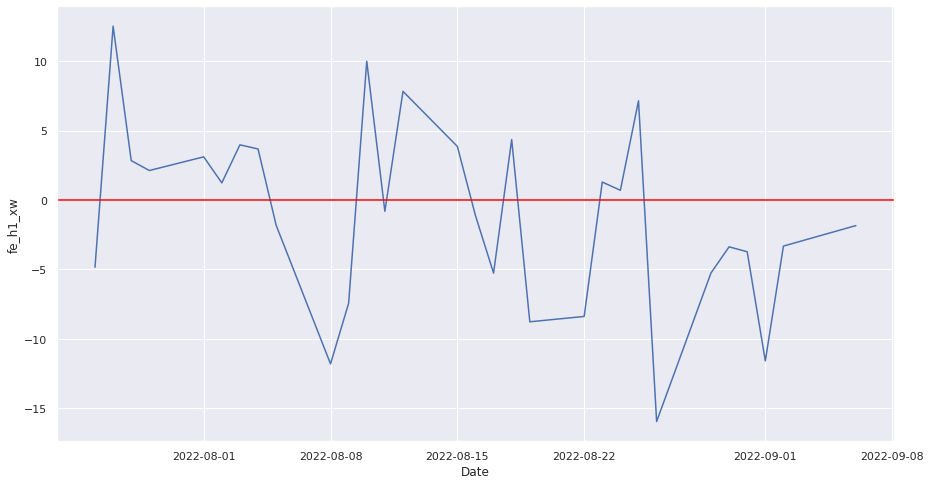

In [37]:
g= sns.lineplot(data=df_test, x='Date',y='fe_h1_xw')
g.axhline(0, color='red')
plt.show()

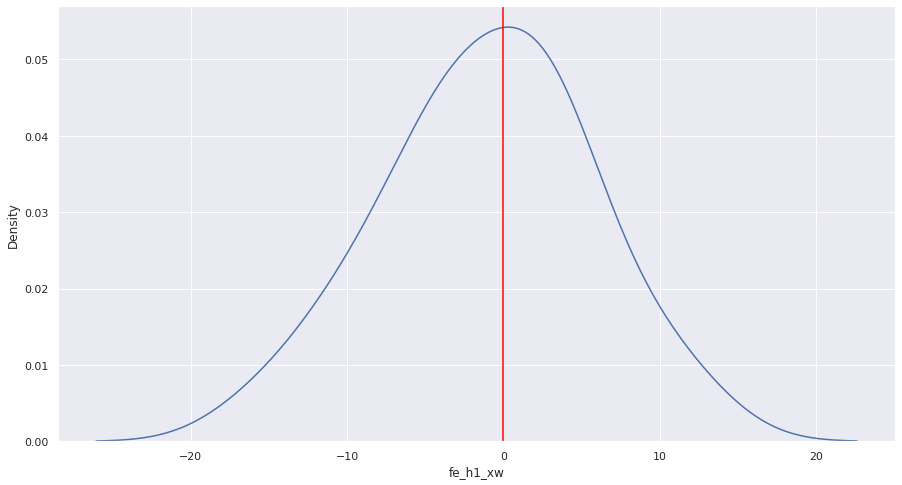

In [38]:
g=sns.kdeplot(data=df_test, x='fe_h1_xw')
g.axvline(0, color='red')
plt.show()

Compared to other graphical evaluations we conducted, the forecasts obtained using expanding window estimation gives us the best results without changing the estimation method (AR(2)). Visually this means that the Kernel Density plot is centered close to 0, scatter plot of forecasts vs actual values are closer the the 45 degree line.

Before we continue to some forecasting metrics and forecasting properties, it is beneficial to discuss the three types of forecasts generated above.

The first forecasting method used is a 30 step ahead forecast (h=30). This is why we saw the forecasts to converge to a trend. The second method is a little bit different, it assumes that you have estimated your model up to T-h, and then used the realized values to update your forecast at each point in time. Hence it is 1 step ahead forecast iterated 30 times. We also call it an ex-post forecast. The third forecast generated is probably the most demanding (computationally) and the most realistic one. In the last case we estimated our model every time we had a new observation (30 times), and generated 1 step ahead forecasts. The last forecasting method is called expanding window, because we grow the estimation window with each new observation.


We now plot all three of the forecasts generated using three different methods to visually assess our forecasts.

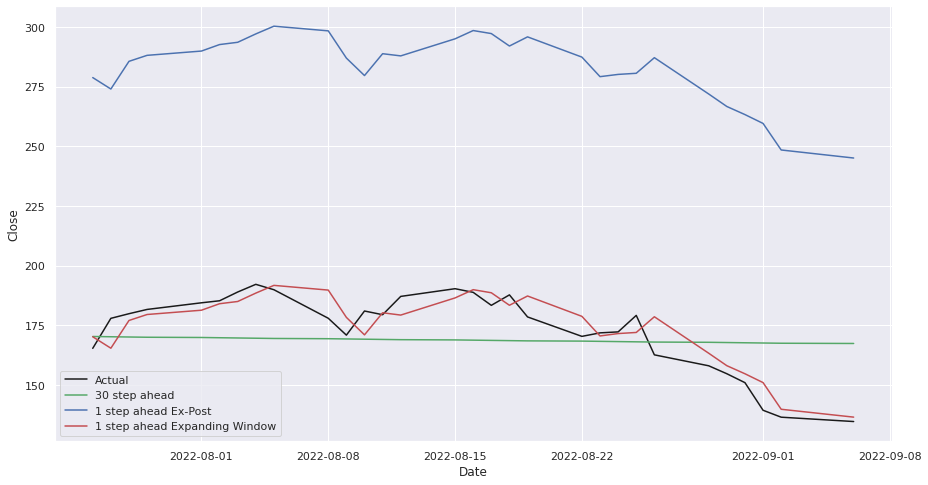

In [39]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df_test,x='Date',y='Close',color = 'k', label='Actual')
sns.lineplot(data=df_test,x='Date',y='f_h30',color = 'g', label='30 step ahead')
sns.lineplot(data=df_test,x='Date',y='f_h1_xp',color = 'b', label='1 step ahead Ex-Post')
sns.lineplot(data=df_test,x='Date',y='f_h1_xw',color = 'r', label = '1 step ahead Expanding Window')



We can clearly see that the expanding window forecasts are performing the best amongst the three forecasting methods used. We can even see that the expanding window forecasts are almost the same as our ex-post forecasts with an intercept shift.

We generate density plots to assess possible bias in our forecasts.

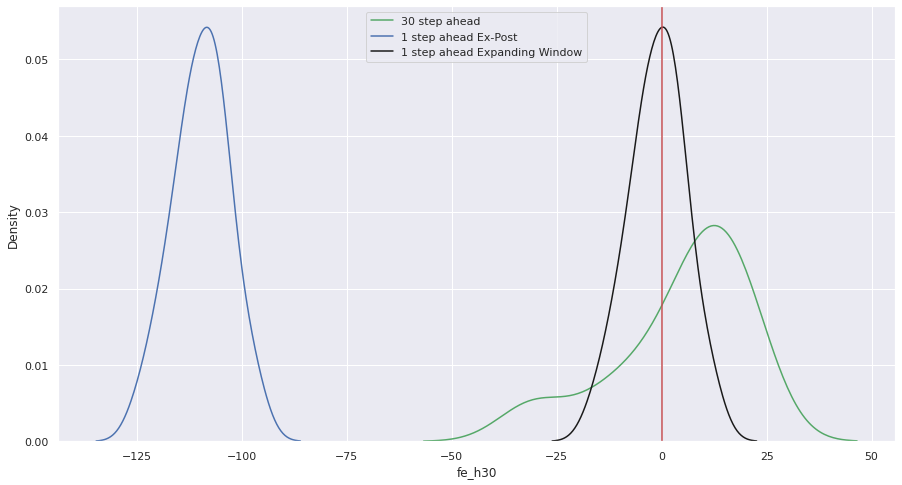

In [40]:
g=sns.kdeplot(data=df_test, x='fe_h30',color='g',label='30 step ahead')
sns.kdeplot(data=df_test, x='fe_h1_xp',color ='b',label='1 step ahead Ex-Post')
sns.kdeplot(data=df_test, x='fe_h1_xw',color ='k',label='1 step ahead Expanding Window')
g.legend()
g.axvline(0,color='r')


We can see that expanding window forecasts and ex-post forecasts have virtually the same kernel density, however, expanding window forecasts are shifted closer to 0, which is exactly what we want. We want the distribution to be centered around 0.

## Forecast Evaluation Metrics

There are three commonly used forecast evaluation metrics:


*   Mean Square Error (MSE): $ T^{-1} \sum_{1}^{T} e_{t+1|t}^2 $ 
*   Root Mean Square Error (RMSE) : $\sqrt{T^{-1} \sum_{1}^{T} e_{t+1|t}^2}$
*   Mean Absolute Error (MAE) : $T^{-1} \sum_{1}^{T} | e_{t+1|t} | $

We can use these metrics to compare two different forecasts, however, it is important to note that these two models use the same horizon to forecasts, as denoted by the subscripts.
Hence, we will calculate these metrics for the 1 step ahead ex-post forecasts and the 1 step ahead expanding window forecasts.



In [41]:
import numpy as np
mse_h1_xp = np.mean(df_test['fe_h1_xp']**2)
rmse_h1_xp = np.sqrt(mse_h1_xp)
mae_h1_xp = np.mean(np.abs(df_test['fe_h1_xp']))

mse_h1_xw = np.mean(df_test['fe_h1_xw']**2)
rmse_h1_xw = np.sqrt(mse_h1_xw)
mae_h1_xw = np.mean(np.abs(df_test['fe_h1_xw']))


In [42]:
print(mse_h1_xp , mse_h1_xw)
print(rmse_h1_xp , rmse_h1_xw)
print(mae_h1_xp , mae_h1_xw)



12065.318444607774 43.77510373159667
109.84224344307509 6.616275669256585
109.647716555446 5.333839638731117


These numbers, by themselves, do not mean much. However, when we use them to compare two different set of forecasts, then we can see that the set of forecast with a higher MSE, RMSE, or MAE performs poorly compared to the other one.

Based on the numbers we see above, the better model is the expanding window, which is not surprising.

## Desirable Forecast Properties

Now we have generated some forecasts, we can check if our forecasts are rational, meaning efficient and unbiased. Before we dive into the construction of these test we show some desirable properties of forecasts.

The below points are for MSE Loss.

1. Optimal forecasts are unbiased: At forecast horizon h  1, the forecast 
error et+hjt has zero mean, both conditionally and unconditionally (on average):
$$E[e_{t+h|t}] = E[e_{t+h|t}|I_t] = 0$$
2. h-period forecast errors ($e_{t+h|t}$) are uncorrelated with information available at the time the forecast was computed ($I_t$). In particular, single-period forecast errors, $e_{t+1|t}$, are serially uncorrelated:
$$E[e_{t+1|t}e_{t|t-1}] = 0$$
3. The variance of the forecast error ($e_{t+h|t}$) increases (weakly) in the
forecast horizon, h :
$$Var(e_{t+h+1|t}) \geq Var(e_{t+h|t}) \quad \forall  \quad h\geq1$$


We want to be able to test the above mentioned properties. To do that we will use parametric methods. To test the efficiency of the forecasts we use the following regression:$$ e_{t+h|t} = \beta ' g(z_{t}) + u_{t+h} .$$
We then test forecast efficiency with $$ H_0: \beta =0 $$
$$H_1: \beta \neq 0 $$
with the null of forecast efficiency.

We assume that the true loss function is MSE Loss.

In [43]:
 import statsmodels.formula.api as smf

In [44]:
efficiency = smf.ols(formula='fe_h1_xw ~ close_1 + close_2',data = df_test).fit()
efficiency.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fe_h1_xw   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.061
Method:                 Least Squares   F-statistic:                    0.1616
Date:                Fri, 23 Sep 2022   Prob (F-statistic):              0.852
Time:                        04:10:34   Log-Likelihood:                -98.712
No. Observations:                  30   AIC:                             203.4
Df Residuals:                      27   BIC:                             207.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4582     17.564     -0.197      0.845     -39.496      32.579
close_1        0.1043      0.192      0.542      0.592      -0.290       0.499
close_2       -0.0897      0.220     -0.407      0.687      -0.542       0.363
==============================================================================
Omnibus:                        0.538   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.146
Skew:                          -0.169   Prob(JB):                        0.929
Kurtosis:                       3.054   Cond. No.                     3.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the regression we can see that, the lagged values are statistically insignificant. Furthermore, the joint test is given by the F-stat, which we also fail to reject. These results suggest that our forecasts are efficient.
We can also check serial correlation in the forecast erros by running an AR(1) on the forecast errors.
The below regression shows that lagged value of the error term is not significant and has a magnitude of -0.15, which is very small. Hence, we conclude no serial correlation in the forecast errors. You can also check this by plotting ACF plot of the forecast errors.

In [45]:
ser_corr = ARIMA(df_test['fe_h1_xw'],order=(1,0,0)).fit()
ser_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               fe_h1_xw   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -98.747
Date:                Fri, 23 Sep 2022   AIC                            203.494
Time:                        04:10:34   BIC                            207.697
Sample:                             0   HQIC                           204.838
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0409      1.328     -0.784      0.433      -3.643       1.561
ar.L1          0.0965      0.289      0.334      0.739      -0.470       0.663
sigma2        42.3062     15.050      2.811      0.005      12.810      71.803
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.98   Prob(JB):                         0.94
Heteroskedasticity (H):               1.13   Skew:                            -0.16
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

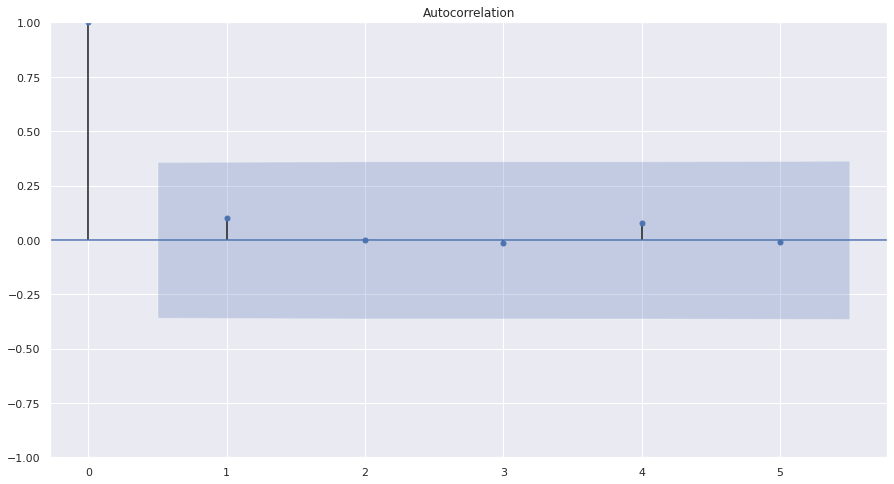

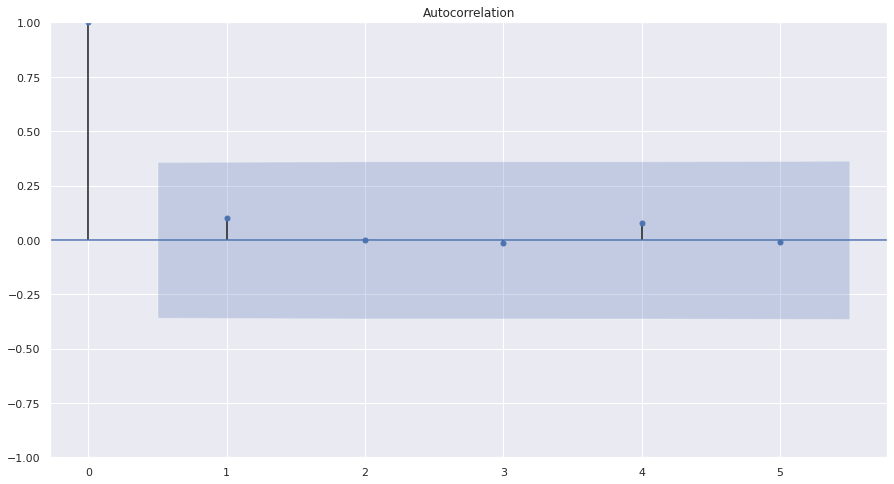

In [46]:
sm.graphics.tsa.plot_acf(df_test['fe_h1_xw'].squeeze(), lags=5)



Now let's test unbiasedness.
There are a few ways of conducting a forecast bias test:
1. $e_{t+h|t} = \alpha + u_{t+h}$, test $H_0: \alpha = 0$
2. $y_{t+h} =  \alpha + \beta f_{t+h|t} + u_{t+h}$, joint test $H_0: \alpha = 0  \quad \& \quad \beta =1$

The first regression is testing if the mean forecast error is different than zero.

The second case is called the Mincer Zarnowitz regression. It is jointly testing if the intercept is equal to zero and the coefficient on the forecast is equal to 1. A non-zero value for the intercept would mean that our forecasts are biased, and a test on the slope equal to 1 means a test of perfect forecast.

In [47]:
bias_1 = smf.ols(formula='fe_h1_xw ~ 1', data= df_test).fit()
bias_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fe_h1_xw   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                nan
Time:                        04:10:35   Log-Likelihood:                -98.890
No. Observations:                  30   AIC:                             199.8
Df Residuals:                      29   BIC:                             201.2
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0244      1.214     -0.844      0.406      -3.507       1.458
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.262
Skew:                          -0.167   Prob(JB):                        0.877
Kurtosis:                       2.687   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression shows that our intercept is statistically insignificant. Hence, we can say that the forecasts are not biased. However, we should also consult the Mincer-Zarnowitz regression.

In [48]:
bias_2 = smf.ols(formula ='Close ~ 1 + f_h1_xw', data=df_test).fit()
bias_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     142.5
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           1.69e-12
Time:                        04:10:35   Log-Likelihood:                -98.808
No. Observations:                  30   AIC:                             201.6
Df Residuals:                      28   BIC:                             204.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9644     15.157     -0.459      0.649     -38.013      24.084
f_h1_xw        1.0341      0.087     11.936      0.000       0.857       1.212
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.200
Skew:                          -0.178   Prob(JB):                        0.905
Kurtosis:                       2.816   Cond. No.                     2.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
hypotheses = '(Intercept = 0), (f_h1_xw = 1)'
bias_2.f_test(hypotheses)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.42308553477027866, p=0.6591404931649754, df_denom=28, df_num=2>

The p value of the joint test is greater than $\alpha=0.05$, therefore we fail to reject the null of rationality.

We ran tests of efficiency and unbiasedness, test results suggest that our forecasts are rational.